# Hypothesis testing

Description du cours

Les tests d'hypothèses vous permettent de répondre à des questions sur vos ensembles de données de manière statistiquement rigoureuse. Dans ce cours, vous développerez vos compétences analytiques Python en apprenant comment et quand utiliser des tests courants tels que les tests t, les tests de proportion et les tests du chi carré. En travaillant avec des données du monde réel, y compris les commentaires des utilisateurs de Stack Overflow, vous acquerrez une compréhension approfondie du fonctionnement de ces tests et des hypothèses clés qui les sous-tendent. Vous découvrirez également comment différents tests sont liés à l'aide du cadre "il n'y a qu'un seul test", avant d'apprendre à utiliser des tests non paramétriques pour dépasser les limites de contourner les exigences des tests d'hypothèse.

## 1 Miam, ce plat teste bien
Comment fonctionne le test d'hypothèse et quels problèmes peut-il résoudre ? Pour le savoir, vous parcourrez le flux de travail pour un test de proportion d'un échantillon. Ce faisant, vous rencontrerez des concepts importants tels que les scores z, les valeurs p et les erreurs de faux négatifs et de faux positifs.

In [1]:
!pip install pyarrow

In [2]:
import pandas as pd
import numpy as np
#import pyarrow.feather as feather
late_shipments = pd.read_feather('late_shipments.feather')

In [3]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [4]:
late_shipments.isnull().sum()

id                           0
country                      0
managed_by                   0
fulfill_via                  0
vendor_inco_term             0
shipment_mode                0
late_delivery                0
late                         0
product_group                0
sub_classification           0
vendor                       0
item_description             0
molecule_test_type           0
brand                        0
dosage                       0
dosage_form                  0
unit_of_measure_per_pack     0
line_item_quantity           0
line_item_value              0
pack_price                   0
unit_price                   0
manufacturing_site           0
first_line_designation       0
weight_kilograms             0
freight_cost_usd            14
freight_cost_groups         14
line_item_insurance_usd     34
dtype: int64

In [5]:
late_shipments["freight_cost_group"] = late_shipments["freight_cost_groups"]

In [6]:
late_shipments['freight_cost_group'] = late_shipments['freight_cost_group'].fillna("expensive")

In [7]:
stack_overflow = pd.read_feather('stack_overflow.feather')

In [8]:
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [9]:
stack_overflow.columns

Index(['respondent', 'main_branch', 'hobbyist', 'age', 'age_1st_code',
       'age_first_code_cut', 'comp_freq', 'comp_total', 'converted_comp',
       'country', 'currency_desc', 'currency_symbol',
       'database_desire_next_year', 'database_worked_with', 'dev_type',
       'ed_level', 'employment', 'ethnicity', 'gender', 'job_factors',
       'job_sat', 'job_seek', 'language_desire_next_year',
       'language_worked_with', 'misc_tech_desire_next_year',
       'misc_tech_worked_with', 'new_collab_tools_desire_next_year',
       'new_collab_tools_worked_with', 'new_dev_ops', 'new_dev_ops_impt',
       'new_ed_impt', 'new_job_hunt', 'new_job_hunt_research', 'new_learn',
       'new_off_topic', 'new_onboard_good', 'new_other_comms', 'new_overtime',
       'new_purchase_research', 'purple_link', 'newso_sites', 'new_stuck',
       'op_sys', 'org_size', 'platform_desire_next_year',
       'platform_worked_with', 'purchase_what', 'sexuality', 'so_account',
       'so_comm', 'so_part_freq'

In [10]:
stack_overflow['undergrad_major'].unique()

array(['Computer science, computer engineering, or software engineering',
       'A natural science (such as biology, chemistry, physics, etc.)',
       None,
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'Mathematics or statistics',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'A business discipline (such as accounting, finance, marketing, etc.)',
       'Information systems, information technology, or system administration',
       'Web development or web design',
       'A health science (such as nursing, pharmacy, radiology, etc.)',
       'I never declared a major',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)'],
      dtype=object)

In [11]:
stack_overflow['undergrad_major'].nunique()

12

In [12]:
stack_overflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   respondent                         2261 non-null   float64 
 1   main_branch                        2261 non-null   object  
 2   hobbyist                           2261 non-null   object  
 3   age                                2261 non-null   float64 
 4   age_1st_code                       2261 non-null   float64 
 5   age_first_code_cut                 2261 non-null   object  
 6   comp_freq                          2261 non-null   object  
 7   comp_total                         2261 non-null   float64 
 8   converted_comp                     2261 non-null   float64 
 9   country                            2261 non-null   object  
 10  currency_desc                      2261 non-null   object  
 11  currency_symbol                    2261 non

In [13]:
stack_overflow.dev_type.unique()

array(['Data or business analyst;Data scientist or machine learning specialist',
       'Data scientist or machine learning specialist;Developer, back-end;Developer, QA or test;Engineer, data;Scientist',
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, full-stack;Engineer, data',
       'Data scientist or machine learning specialist;Scientist',
       'Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, front-end;Developer, full-stack',
       'Data scientist or machine learning specialist;Developer, back-end;Developer, front-end;Developer, full-stack',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Engineer, data;Scientist',
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;Developer, game or graphics;Develop

In [14]:
stack_overflow.dev_type.nunique()

995

# Calcul de la moyenne de l'échantillon
L'ensemble de données late_shipments contient des données sur la chaîne d'approvisionnement concernant la livraison de fournitures médicales. Chaque ligne représente une livraison d'une pièce. Les colonnes late indiquent si la pièce a été livrée en retard ou non. Une valeur de « Oui » signifie que la pièce a été livrée en retard et une valeur de « Non » signifie que la pièce a été livrée à temps.

In [15]:
# Print the late_shipments dataset
print(late_shipments)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

In [16]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == 'Yes').mean()

# Print the results
print(late_prop_samp)

0.061


In [17]:
late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
        (late_shipments['late'] == 'Yes').sample(1000, replace=True).mean()
    )
   

In [18]:
len(late_shipments_boot_distn)

5000

In [19]:
late_shipments_boot_distn

[0.055,
 0.069,
 0.053,
 0.054,
 0.058,
 0.057,
 0.064,
 0.052,
 0.056,
 0.06,
 0.055,
 0.063,
 0.054,
 0.063,
 0.067,
 0.064,
 0.058,
 0.058,
 0.063,
 0.06,
 0.061,
 0.059,
 0.067,
 0.064,
 0.065,
 0.07,
 0.056,
 0.065,
 0.061,
 0.049,
 0.057,
 0.075,
 0.057,
 0.065,
 0.059,
 0.054,
 0.062,
 0.051,
 0.068,
 0.069,
 0.064,
 0.058,
 0.064,
 0.082,
 0.052,
 0.056,
 0.057,
 0.06,
 0.048,
 0.054,
 0.055,
 0.069,
 0.057,
 0.056,
 0.047,
 0.06,
 0.072,
 0.055,
 0.049,
 0.048,
 0.067,
 0.076,
 0.069,
 0.064,
 0.05,
 0.061,
 0.063,
 0.071,
 0.049,
 0.065,
 0.062,
 0.067,
 0.058,
 0.066,
 0.072,
 0.062,
 0.064,
 0.068,
 0.061,
 0.068,
 0.062,
 0.068,
 0.058,
 0.061,
 0.059,
 0.066,
 0.072,
 0.068,
 0.059,
 0.057,
 0.054,
 0.068,
 0.054,
 0.065,
 0.052,
 0.056,
 0.06,
 0.055,
 0.067,
 0.062,
 0.069,
 0.055,
 0.06,
 0.06,
 0.066,
 0.053,
 0.061,
 0.069,
 0.064,
 0.067,
 0.067,
 0.062,
 0.064,
 0.057,
 0.061,
 0.066,
 0.059,
 0.063,
 0.054,
 0.053,
 0.061,
 0.059,
 0.077,
 0.053,
 0.052,
 0.059,
 

In [20]:
late_prop_samp_ = np.mean(late_shipments_boot_distn)

In [21]:
late_prop_samp_

0.060912400000000005

In [22]:
late_prop_samp = 0.061

In [23]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.13201506829732518


In [24]:
std_error

0.007574892873196828

### Calcul p-value

In [25]:
from scipy.stats import norm

In [26]:
# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.44748618664311646


### Calcul intervalle de confiance

In [27]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.076)


Cool et confiant !       
Lorsque vous avez un intervalle de confiance égal à un moins le niveau de signification, si le paramètre de population hypothétique se situe dans l'intervalle de confiance, vous ne devez pas rejeter l'hypothèse nulle.

## Tests à deux échantillons et ANOVA
Dans ce chapitre, vous apprendrez à tester les différences de moyennes entre deux groupes à l’aide de tests t et à étendre cette méthode à plus de deux groupes à l’aide d’ANOVA et de tests t par paires.

In [28]:
stack_overflow.describe()

,respondent,age,age_1st_code,comp_total,converted_comp,work_week_hrs,years_code,years_code_pro
count,2261.000000,2261.000000,2261.000000,2.261000e+03,2.261000e+03,2219.000000,2261.000000,2261.000000
mean,28919.827952,31.907121,14.933215,3.238167e+06,1.195747e+05,41.588936,14.184874,7.758514
std,18404.377715,8.225540,4.767279,5.593237e+07,2.655561e+05,14.589201,9.177664,7.236955
min,36.000000,16.000000,5.000000,0.000000e+00,0.000000e+00,4.000000,1.000000,1.000000
25%,14033.000000,26.000000,12.000000,2.701000e+04,2.749200e+04,40.000000,7.000000,3.000000
50%,26119.000000,30.000000,15.000000,7.000000e+04,5.837300e+04,40.000000,12.000000,5.000000
75%,46996.000000,36.000000,18.000000,1.430000e+05,1.042080e+05,45.000000,19.000000,10.000000
max,62882.000000,85.000000,45.000000,1.900000e+09,2.000000e+06,375.000000,50.000000,50.000000


In [29]:
stack_overflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   respondent                         2261 non-null   float64 
 1   main_branch                        2261 non-null   object  
 2   hobbyist                           2261 non-null   object  
 3   age                                2261 non-null   float64 
 4   age_1st_code                       2261 non-null   float64 
 5   age_first_code_cut                 2261 non-null   object  
 6   comp_freq                          2261 non-null   object  
 7   comp_total                         2261 non-null   float64 
 8   converted_comp                     2261 non-null   float64 
 9   country                            2261 non-null   object  
 10  currency_desc                      2261 non-null   object  
 11  currency_symbol                    2261 non

# Calcul du t-test

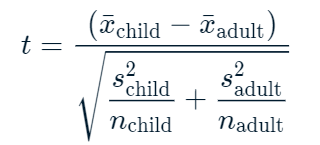

In [30]:
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

In [31]:
xbar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [32]:
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()

In [33]:
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [34]:
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()

In [35]:
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

In [36]:
xbar['child']

132419.5706214689

In [37]:
numerator = xbar['child'] - xbar['adult']

In [38]:
denominator = np.sqrt((s['child']**2/n['child']) + (s['adult']**2/n['adult']))

In [39]:
t_stat = numerator/denominator

In [40]:
t_stat

1.8699313316221844

late_shipment

In [41]:
xbar_2 = late_shipments.groupby('late')['weight_kilograms'].mean()

In [42]:
xbar_2

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64

In [43]:
s_2 = late_shipments.groupby('late')['weight_kilograms'].std()

In [44]:
s_2

late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64

In [45]:
n_2 = late_shipments.groupby('late')['weight_kilograms'].count()

In [46]:
n_2

late
No     939
Yes     61
Name: weight_kilograms, dtype: int64

In [47]:
numerator_2 = xbar_2['No'] - xbar_2['Yes']

In [48]:
denominator_2 = np.sqrt((s_2['Yes']**2/n_2['Yes']) + (s_2['No']**2/n_2['No']))

In [49]:
t_stat_2 = numerator_2/denominator_2

In [50]:
t_stat_2

-2.3936661778766433

#### t stat to p

Excellente distribution !      
Utiliser un écart type d'échantillon pour estimer l'erreur type est plus simple à calculer que d'utiliser la méthode bootstrapping. Cependant, pour corriger l'approximation, vous devez utiliser une distribution t lors de la transformation de la statistique de test pour obtenir la valeur p.

In [51]:
from scipy.stats import t

In [52]:
# Calculate the degrees of freedom
degrees_of_freedom = n_2['Yes'] + n_2['No'] - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat_2, df = degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


In [53]:
degrees_of_freedom

998

In [54]:
t_stat_2

-2.3936661778766433

In [55]:
# Calculate the degrees of freedom
degrees_of_freedom_ = n['child'] + n['adult'] - 2

# Calculate the p-value from the test stat
p_value_ = 1 - t.cdf(t_stat, df = degrees_of_freedom_)

# Print the p_value
print(p_value_)

0.030811302165157595


## Paired t test

In [56]:
sample_data = pd.read_feather('repub_votes_potus_08_12.feather')

In [57]:
sample_data.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


In [58]:
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']

In [59]:
import matplotlib.pyplot as plt

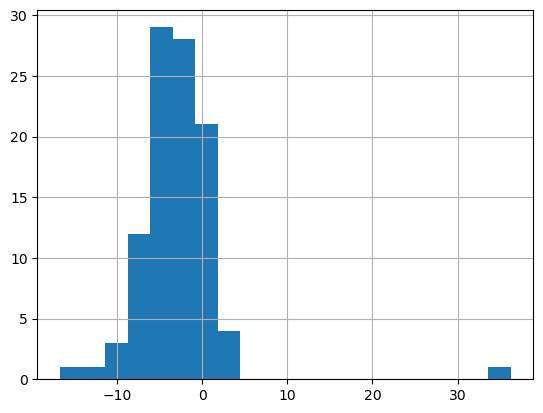

In [60]:
sample_data['diff'].hist(bins=20)
plt.show()

In [61]:
xbar_diff = sample_data['diff'].mean()

In [62]:
xbar_diff

-2.877109041242944

In [63]:
n_diff = len(sample_data)

In [64]:
n_diff

100

In [65]:
s_diff = sample_data['diff'].std()

In [66]:
s_diff

5.136737887231852

In [67]:
t_stat_diff = (xbar_diff - 0) / np.sqrt(s_diff**2/n_diff)

In [68]:
t_stat_diff

-5.601043121928489

In [69]:
deegre_of_freedom_diff = n_diff - 1

In [70]:
deegre_of_freedom_diff

99

In [71]:
p_value_diff = t.cdf(t_stat_diff, df=deegre_of_freedom_diff)

In [72]:
p_value_diff

9.572537285272411e-08

# Pingouin

In [73]:
! pip install pingouin

In [74]:
import pingouin

In [75]:
pingouin.ttest(x=sample_data['diff'], y=0, alternative='less')
# y=0 difference par rapport a l hypothese nulle qui est 0
# alterntive can bilateral, less or greater

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


In [76]:
pingouin.ttest(x=sample_data['repub_percent_08'], 
               y=sample_data['repub_percent_12'], 
               paired=True,
               alternative='less')


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


Si l echantillon n est pas apparie mettre 'paired'=False qui est lavaleur par defaut et correspond au t test non apparie

In [77]:
sample_dem_data = pd.read_feather('dem_votes_potus_12_16.feather')

In [78]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


In [79]:
# Find the mean of the diff column
xbar_diff_2 = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff_2)

6.829312660106834


In [80]:
# Find the standard deviation of the diff column
s_diff_2 = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff_2)

5.040139140132316


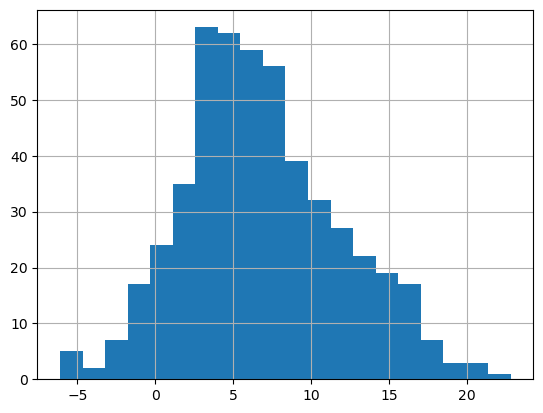

In [81]:

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

In [82]:
# Conduct a t-test on diff
test_results = pingouin.ttest(sample_dem_data['diff'],
                              y = 0,
                              paired=False,                    
alternative='two-sided')

# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [83]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              paired=True,
                              alternative="two-sided")

# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


C:\Users\ADMIN\anaconda3\Lib\site-packages\pingouin\parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


# ANOVA

In [84]:
stack_overflow['job_sat'].unique()

['Slightly satisfied', 'Very satisfied', 'Neither', 'Very dissatisfied', 'Slightly dissatisfied']
Categories (5, object): ['Very dissatisfied', 'Slightly dissatisfied', 'Neither', 'Slightly satisfied', 'Very satisfied']

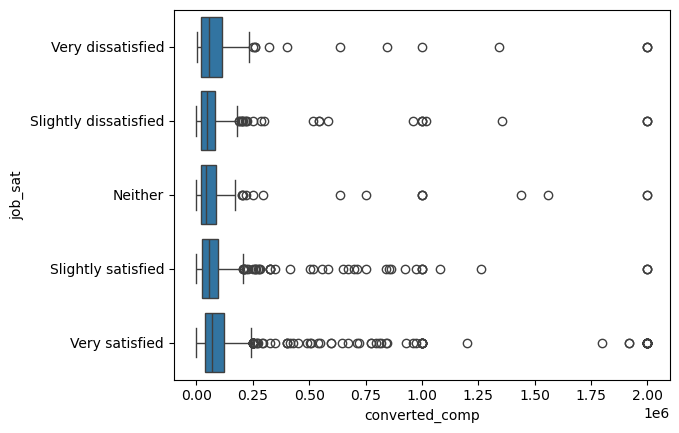

In [85]:
import seaborn as sns
sns.boxplot(x='converted_comp', y='job_sat', data=stack_overflow)
plt.show()

very satisfied semble plus grand. Est ce significatif

Mettons alpha a 0.2

In [86]:
pingouin.anova(data=stack_overflow, dv='converted_comp', between='job_sat')
# dv = dependent variable

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


In [87]:
# p_value = p-unc < alpha 0.2 au moins deux sous groupes de job satisfaction sont statistiquement different mais lesquels

In [88]:
# 10 paires de tests sont possibles

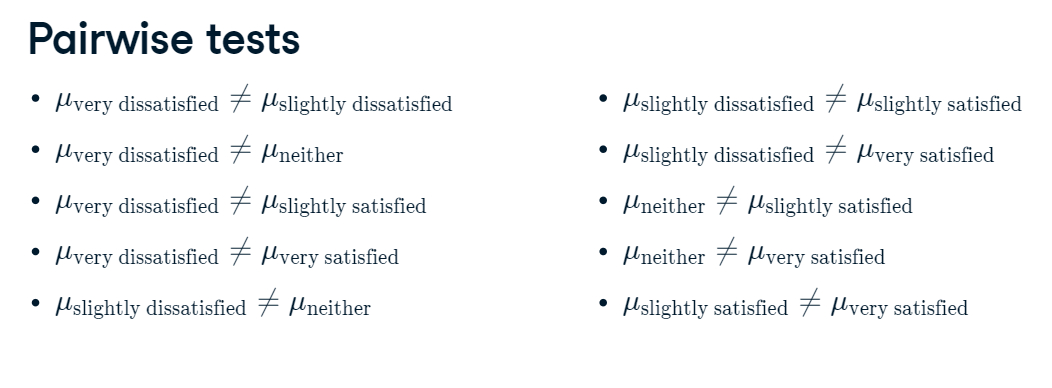

In [89]:
pingouin.pairwise_tests(data=stack_overflow, dv='converted_comp', between='job_sat', padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


In [90]:
# Il n y  que 3 paires qui sont differentes ie p_unc < 0.2
# 5 groupes donnent 10 paires
# Plus le nombre de groupes augmente la probabilit2 d avoir au moins une paire statistiquement significative est eleve.

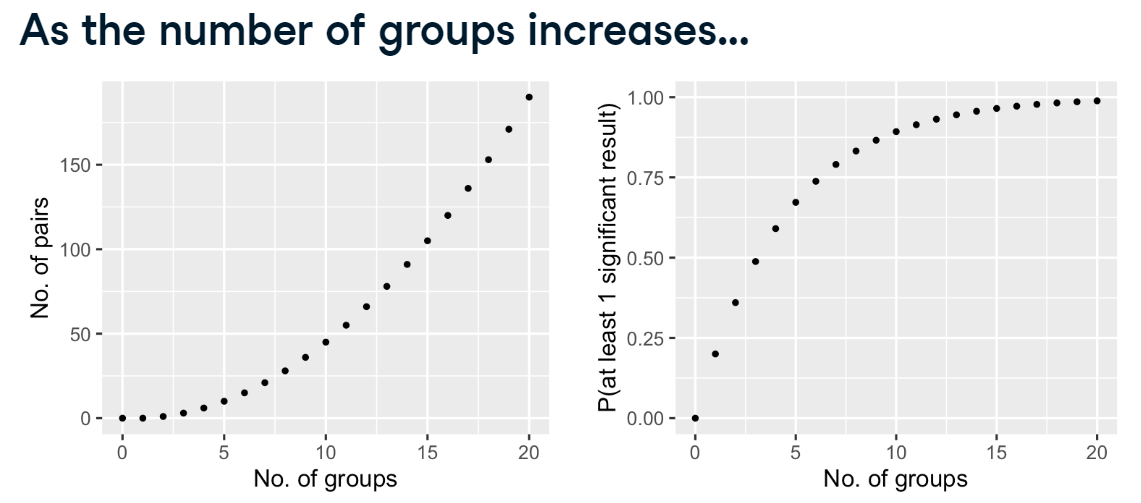

10 groupes = 70 pourcent d avoir au moins une paire significative   
20 groupes = 100 pour cent d avoir au moins une paire significative  

Appliquer un ajustement qui va augmenter la p_value en reduisant le risque d avoir un faux positif  
padjust='bonf'

In [91]:
pingouin.pairwise_tests(data=stack_overflow, dv='converted_comp', between='job_sat', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


Avec l ajustement de Bonferroni, on a une nouvelle colonne p_corr et dans p-unc 2 valeurs seulement sont inferieur a alpha 0.2

#### ANOVA with shipment

In [92]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


In [93]:
# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


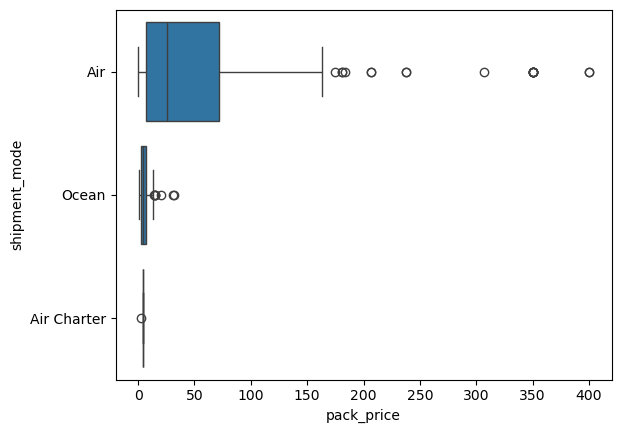

In [94]:
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price', y='shipment_mode', data=late_shipments)
plt.show()

In [95]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments, dv='pack_price', between='shipment_mode')

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


In [96]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_ttests(data=late_shipments, dv='pack_price', between='shipment_mode', padjust='none')

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


C:\Users\ADMIN\anaconda3\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [97]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_ttests(data=late_shipments, 
                                            dv="pack_price",
                                            between="shipment_mode",
                                            padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


C:\Users\ADMIN\anaconda3\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


## Tests de proportionnalité à un échantillon

In [98]:
# stack_overflow

In [99]:
alpha = 0.01

In [100]:
stack_overflow['age_cat'].value_counts()

age_cat
Under 30       1211
At least 30    1050
Name: count, dtype: int64

In [101]:
stack_overflow['age_cat'].value_counts(normalize=True)

age_cat
Under 30       0.535604
At least 30    0.464396
Name: proportion, dtype: float64

In [102]:
p_hat = (stack_overflow['age_cat'] == 'Under 30').mean()

In [103]:
p_hat

0.5356037151702786

In [104]:
p_0 = 0.5

In [105]:
n_prop = len(stack_overflow)

In [106]:
n_prop

2261

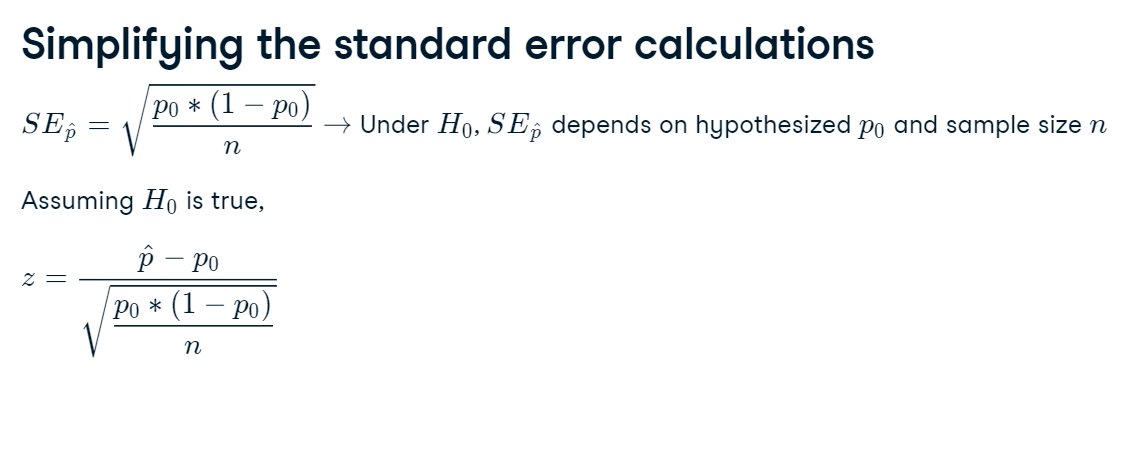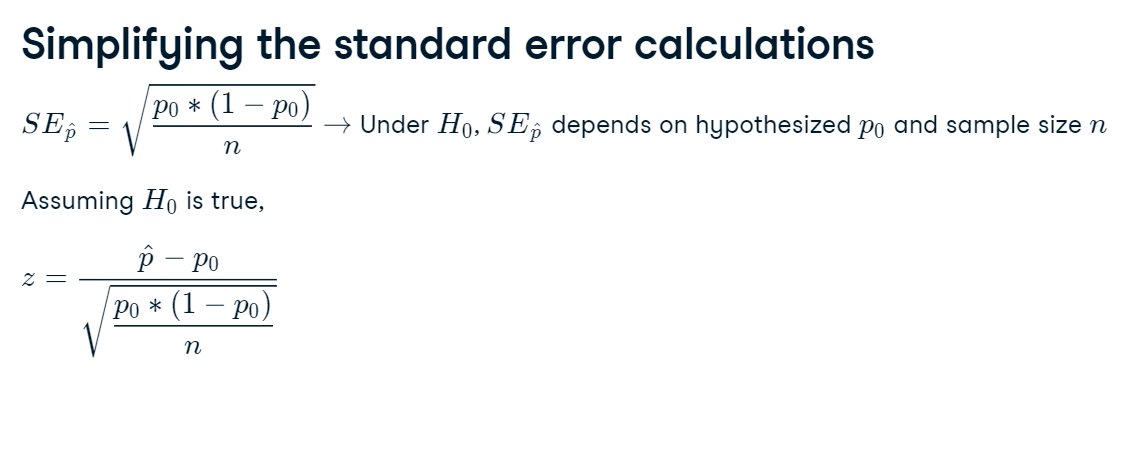

In [107]:
numerator_proportion = p_hat - p_0

In [108]:
denominator_proportion = np.sqrt(p_0 * (1 - p_0)/n_prop)

In [109]:
z_prop = numerator_proportion/denominator_proportion

In [110]:
z_prop

3.385911440783663

#### calcul p_value test proportion

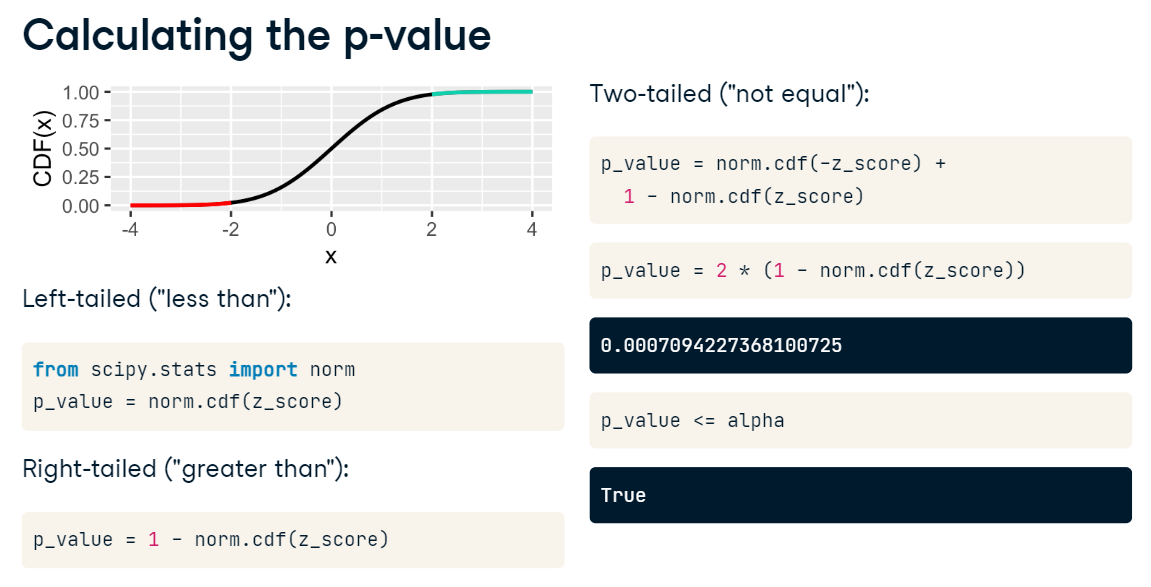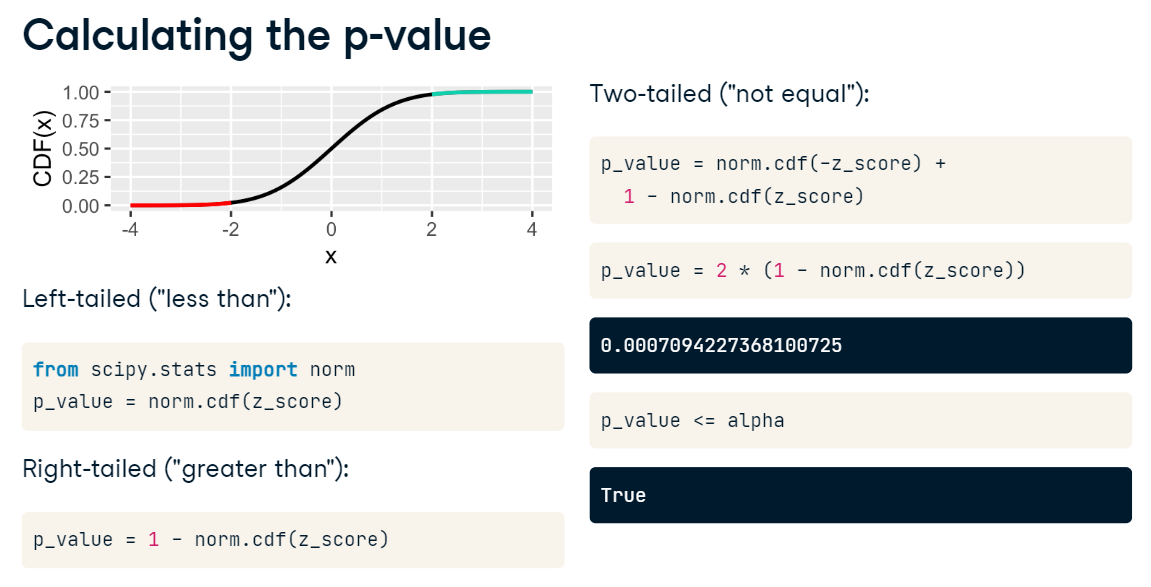

In [111]:
p_value_proportion = 2 * (1 - norm.cdf(z_prop))

In [112]:
p_value_proportion

0.0007094227368100725

In [113]:
#  p_value_proportion est inferieur a alpha

### late_shipment

In [114]:
# Hypothesize that the proportion of late shipments is 6% (greater than)
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late']=="Yes").mean()

# Calculate the sample size
n = late_shipments.shape[0]

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [115]:
# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt((p_0*(1 - p_0))/n)

# Calculate the test statistic
z_score = numerator/denominator

# Print the result
print(z_score)

0.13315591032282698


In [116]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

# Print the p-value
print(p_value)

0.44703503936503364


## Two-sample proportion tests

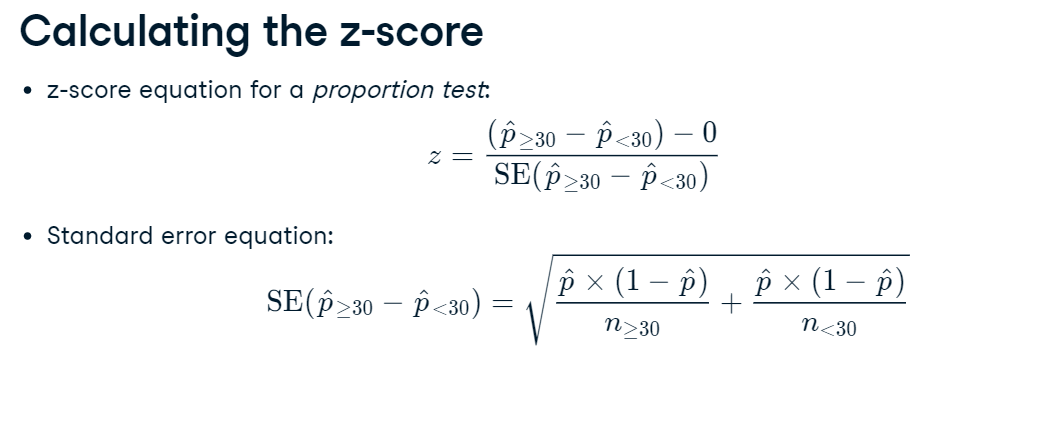

In [117]:
# stackoverflow

In [118]:
p_hats = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize=True)

In [119]:
p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: proportion, dtype: float64

In [120]:
n = stack_overflow.groupby('age_cat')['hobbyist'].count()

In [121]:
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [122]:
p_hat_at_least_30 = p_hats[('At least 30', 'Yes')]
p_hat_under_30 = p_hats[('Under 30', 'Yes')]
print(p_hat_at_least_30, p_hat_under_30)

0.7733333333333333 0.8431048720066061


In [123]:
n_at_least_30 = n['At least 30']
n_under_30 = n['Under 30']
print(n_at_least_30, n_under_30)

1050 1211


In [124]:
p_hat = (p_hat_at_least_30 * n_at_least_30 + p_hat_under_30 * n_under_30) / (n_at_least_30 + n_under_30)

In [125]:
std_error = np.sqrt(p_hat * (1 - p_hat) / n_at_least_30 + p_hat * (1 - p_hat) / n_under_30)

In [126]:
z_score_2_sample_prop = (p_hat_at_least_30 - p_hat_under_30) / std_error

In [127]:
z_score_2_sample_prop

-4.223691463320559

## Proportion test using proportions_ztest()

In [128]:
stack_overflow.groupby('age_cat')['hobbyist'].value_counts()

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: count, dtype: int64

In [129]:
n_hobbyists = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190]) 

In [130]:
from statsmodels.stats.proportion import proportions_ztest

z_score_2_sample_prop_2, p_value_2_sample_prop_2 = proportions_ztest(count=n_hobbyists, nobs=n_rows, alternative='two-sided')

In [131]:
z_score_2_sample_prop_2, p_value_2_sample_prop_2

(-4.223691463320559, 2.403330142685068e-05)

In [132]:
# Les variables Hobbyist et cat_age sont associees

In [133]:
# lateshipment

In [134]:
late_shipments.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd', 'freight_cost_group'],
      dtype='object')

In [135]:
p_hats_2_sample_proportion_2 = late_shipments.groupby('freight_cost_group')['late'].value_counts(normalize=True)

In [136]:
p_hats_2_sample_proportion_2

freight_cost_group  late
expensive           No      0.917431
                    Yes     0.082569
reasonable          No      0.964835
                    Yes     0.035165
Name: proportion, dtype: float64

In [137]:
late_shipments.groupby('freight_cost_group')['late'].value_counts()

freight_cost_group  late
expensive           No      500
                    Yes      45
reasonable          No      439
                    Yes      16
Name: count, dtype: int64

In [138]:
ns = late_shipments.groupby('freight_cost_group')['late'].count()

In [139]:
ns

freight_cost_group
expensive     545
reasonable    455
Name: late, dtype: int64

In [140]:
# Calculate the pooled estimate of the population proportion
p_hat =  (p_hats_2_sample_proportion_2["reasonable"] * ns["reasonable"] + p_hats_2_sample_proportion_2["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Print the result
print(p_hat)

late
No     0.939
Yes    0.061
Name: proportion, dtype: float64


In [141]:
p_hat = p_hat['Yes']

In [142]:
p_hat

0.061

In [143]:
# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat*(1-p_hat)

In [144]:
p_hat_times_not_p_hat

0.057279000000000004

In [145]:
# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = (p_hat_times_not_p_hat/ns['reasonable']) + (p_hat_times_not_p_hat/ns['expensive'])


In [146]:
p_hat_times_not_p_hat_over_ns

0.00023098699465671943

In [147]:
# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)

0.015198256303165816


In [148]:
# Calculate the z-score
z_score = (p_hats_2_sample_proportion_2['expensive'] - p_hats_2_sample_proportion_2['reasonable'])/std_error

# Print z_score
print(z_score)

late
No    -3.11904
Yes    3.11904
Name: proportion, dtype: float64


In [149]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score['Yes'], loc=0,scale=1)

# Print p_value
print(p_value)

0.0009072060637050905


In [150]:
# by using proportions_ztest from statsmodels

In [151]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby('freight_cost_group')['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_group  late
expensive           No      500
                    Yes      45
reasonable          No      439
                    Yes      16
Name: count, dtype: int64


In [152]:
# Put the two "Yes" counts into an array
success_counts = np.array([late_by_freight_cost_group[('expensive', 'Yes')], late_by_freight_cost_group[('reasonable', 'Yes')]])

# Put the two group counts into an array
n = np.array([late_by_freight_cost_group[('expensive', 'Yes')] + late_by_freight_cost_group[('expensive', 'No')], late_by_freight_cost_group[('reasonable', 'No')] + late_by_freight_cost_group[('reasonable', 'Yes')]])


In [153]:
print(success_counts, n)

[45 16] [545 455]


In [154]:
# Run a z-test on the two proportions
stat, p_value = proportions_ztest(success_counts, nobs=n, alternative='larger')

In [155]:
stat, p_value

(3.1190401865206128, 0.0009072060637051224)

# TEST D INDEPENDANCE DU KHI CARRE

In [156]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist', y='age_cat', correction=False)

In [157]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.839570,1.0,0.000024,0.088826,0.988205
1,cressie-read,0.666667,17.818114,1.0,0.000024,0.088773,0.988126
2,log-likelihood,0.000000,17.802653,1.0,0.000025,0.088734,0.988069
3,freeman-tukey,-0.500000,17.815060,1.0,0.000024,0.088765,0.988115
4,mod-log-likelihood,-1.000000,17.848099,1.0,0.000024,0.088848,0.988236
5,neyman,-2.000000,17.976656,1.0,0.000022,0.089167,0.988694


##### chi2 statistics = 17.839570 = (-4.223691463320559) **2 = z_score **2

In [158]:
# job_satisfaction et age_cat

In [159]:
stack_overflow['age_cat'].value_counts()

age_cat
Under 30       1211
At least 30    1050
Name: count, dtype: int64

In [160]:
stack_overflow['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

Hypothese nulle cat age est independant de satisfaction du job         
Hypothese alternative cat age n est pas independant de job satisfaction    
alpha = 0.1

In [161]:
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13024\2640353280.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)


In [162]:
props

job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: proportion, dtype: float64

In [163]:
wide_props = props.unstack()
wide_props

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


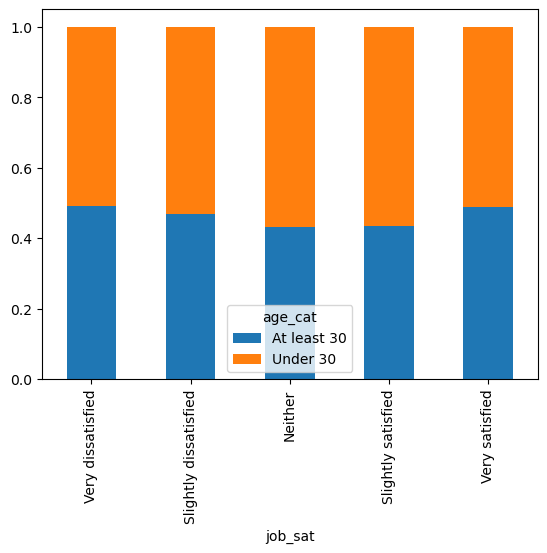

In [164]:
wide_props.plot(kind='bar', stacked=True)
plt.show()

Si cat_age etait independante de job_sat, la repartition entre les categories d age seraient a la meme hauteur dans chacune des 5 barres

In [165]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x=('job_sat'), y=('age_cat'))

In [166]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


Nous avons besoin de correction car le nombre de degre de liberte est de     
ddof = (nombre de reponses de categorie - 1) * (nombre de categories d explication - 1)   
ddof = (2-1) * (5-1) = 4      

p_value est de 0.23 > alpha qui est 0.1 donc les deux variables sont independantes

##### Swapping the variables

In [167]:
props = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)

In [168]:
props

age_cat      job_sat              
At least 30  Very satisfied           0.408571
             Slightly satisfied       0.281905
             Slightly dissatisfied    0.152381
             Neither                  0.082857
             Very dissatisfied        0.074286
Under 30     Very satisfied           0.371594
             Slightly satisfied       0.317093
             Slightly dissatisfied    0.150289
             Neither                  0.094137
             Very dissatisfied        0.066887
Name: proportion, dtype: float64

In [169]:
wide_props = props.unstack()
wide_props

job_sat,Very dissatisfied,Slightly dissatisfied,Neither,Slightly satisfied,Very satisfied
age_cat,,,,,
At least 30,0.074286,0.152381,0.082857,0.281905,0.408571
Under 30,0.066887,0.150289,0.094137,0.317093,0.371594


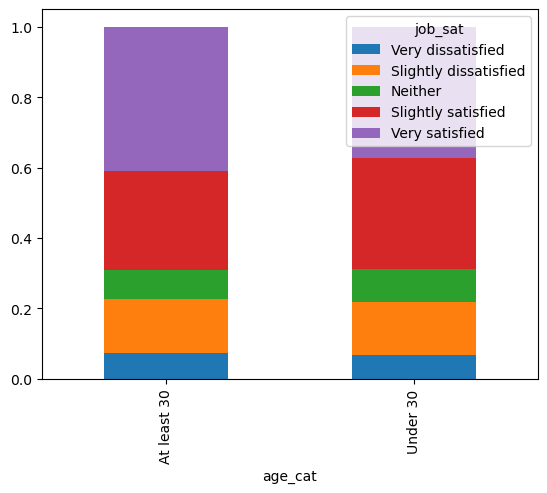

In [170]:
wide_props.plot(kind='bar', stacked=True)
plt.show()

In [171]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='age_cat', y='job_sat')

In [172]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


In [173]:
stats[stats['test'] == 'pearson']

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,5.552373,4.0,0.235164,0.049555,0.437417


In [174]:
# Les resultats sont identiques

In [175]:
# lateshipment

vendor_inco_term    
EXW : « Ex works ». L'acheteur paie le transport des marchandises.
CIP : « Carriage and insurance paid to ». Le vendeur paie le fret et l'assurance jusqu'à ce que les marchandises embarquent sur un navire.
DDP : « Delivered duty paid ». Le vendeur paie le transport des marchandises jusqu'à ce qu'elles atteignent un port de destination.
FCA : « Free carrier ». Le vendeur paie le transport des marchandises.

Hypothesis    
H0: vendor_inco_term and freight_cost_group are independent.      
HA: vendor_inco_term and freight_cost_group are associated.

In [176]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Print props
print(props)

vendor_inco_term  freight_cost_group
CIP               reasonable            0.607143
                  expensive             0.392857
DDP               expensive             0.550000
                  reasonable            0.450000
DDU               reasonable            1.000000
EXW               expensive             0.587432
                  reasonable            0.412568
FCA               reasonable            0.657658
                  expensive             0.342342
Name: proportion, dtype: float64


In [177]:
# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

freight_cost_group  expensive  reasonable
vendor_inco_term                         
CIP                  0.392857    0.607143
DDP                  0.550000    0.450000
DDU                       NaN    1.000000
EXW                  0.587432    0.412568
FCA                  0.342342    0.657658


In [178]:
# La valeur "DDU" a une valeur nulle

In [179]:
late_shipments[late_shipments["vendor_inco_term"] == "DDU"]

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd,freight_cost_group
764,15195.0,Guyana,PMO - US,Direct Drop,DDU,Air,0.0,No,ARV,Pediatric,...,12501.0,46.3,0.77,"BMS Meymac, France",Yes,59.0,180.0,reasonable,26.95,reasonable


In [180]:
late_shipments.drop(764, inplace=True)

In [181]:
# On verifie

In [182]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Print props
print(props)

vendor_inco_term  freight_cost_group
CIP               reasonable            0.607143
                  expensive             0.392857
DDP               expensive             0.550000
                  reasonable            0.450000
EXW               expensive             0.587432
                  reasonable            0.412568
FCA               reasonable            0.657658
                  expensive             0.342342
Name: proportion, dtype: float64


In [183]:
# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

freight_cost_group  expensive  reasonable
vendor_inco_term                         
CIP                  0.392857    0.607143
DDP                  0.550000    0.450000
EXW                  0.587432    0.412568
FCA                  0.342342    0.657658


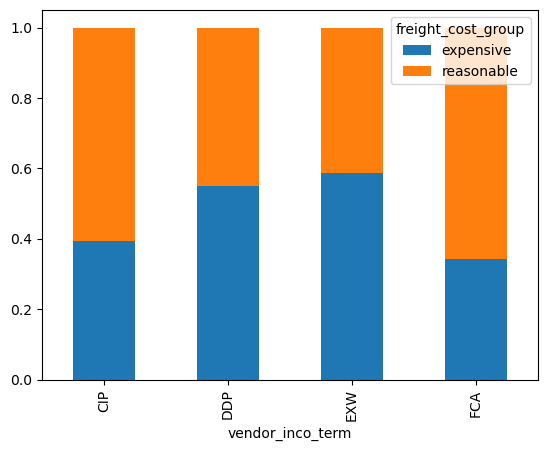

In [184]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind='bar', stacked=True)
plt.show()

In [185]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x='freight_cost_group', y='vendor_inco_term')

# Print results
print(stats[stats['test'] == 'pearson']) 

      test  lambda       chi2  dof      pval    cramer    power
0  pearson     1.0  28.940828  3.0  0.000002  0.170205  0.99775


Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.

## Tests d'ajustement du Chi-carré

Cette fois nous utiliserons une autre variante du chi carre pour comparer une seule variable categorielle a une distribution theorique.

L enquete stackoverflow contient une question amusante. How do you feel when you discover that you've already visited the top resource ?.   
(Que ressentez-vous lorsque vous découvrez que vous avez déjà visité la ressource la plus importante egalement appele purple link (liens violets) pour resoudre un probleme de codage?)

Quelle est la signification du lien violet ?
Le comportement par défaut de la plupart des navigateurs Web est d'afficher les liens visités en violet. Cela permet aux utilisateurs de garder une trace des sites Web qu'ils ont déjà visités 

In [186]:
purple_link_counts = stack_overflow["purple_link"].value_counts()

In [187]:
purple_link_counts

purple_link
Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: count, dtype: int64

Bonjour, vieil ami 1225   
Indifférent 405   
Amusé 368     
Agacé 263

In [188]:
type(purple_link_counts)

pandas.core.series.Series

In [189]:
purple_link_counts = purple_link_counts.rename_axis("purple_link").reset_index(name='n').sort_values("purple_link")

In [190]:
purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [191]:
type(purple_link_counts)

pandas.core.frame.DataFrame

In [192]:
hypothesized = pd.DataFrame(
    {
        "purple_link" : ["Amused", "Annoyed", "Hello, old friend", "Indifferent"],
        "prop" : [1/6, 1/6, 1/2, 1/6]
    }
)

H0: Sample match hypothesized distribution                      
HA: Sample does not match hypothesized distribution

khi2 montre si le sample provient de l'echantillon hypothetique

In [193]:
alpha = 0.01

In [194]:
n_total = len(stack_overflow)

In [195]:
hypothesized['n'] = hypothesized['prop'] * n_total

In [196]:
hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


In [197]:
# diagramme en barre pour la visualisation

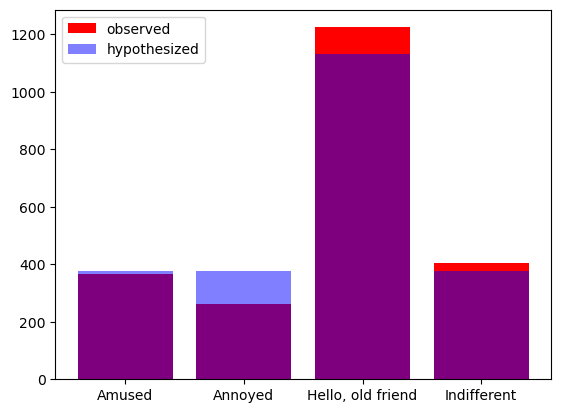

In [198]:
plt.bar(purple_link_counts["purple_link"], purple_link_counts["n"], color="red", label="observed")
plt.bar(hypothesized["purple_link"], hypothesized["n"], color="blue", alpha=0.5, label="hypothesized")
plt.legend()
plt.show()

Pour le test d ajustement (ie comparer avec les donnees observees a celle hypothetiques), on utilise scipy.stats

In [199]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts["n"], f_exp=hypothesized["n"])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

p_value faible, les deux echantilons sont differents

late_shipment

In [200]:
hypothesized = pd.DataFrame(
    {
        "vendor_inco_term" : ["CIP", "DDP", "EXW", "FCA"],
        "prop" : [0.05, 0.1, 0.75, 0.1]
    }
)

In [201]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized['n'] = hypothesized['prop'] * n_total
# Print the modified hypothesized DataFrame
print(hypothesized)

  vendor_inco_term  prop       n
0              CIP  0.05   49.95
1              DDP  0.10   99.90
2              EXW  0.75  749.25
3              FCA  0.10   99.90


In [202]:
incoterm_counts = late_shipments["vendor_inco_term"].value_counts()

In [203]:
incoterm_counts = incoterm_counts.rename_axis("vendor_inco_term").reset_index(name='n').sort_values("vendor_inco_term")

In [204]:
incoterm_counts

,vendor_inco_term,n
3,CIP,56
2,DDP,100
0,EXW,732
1,FCA,111


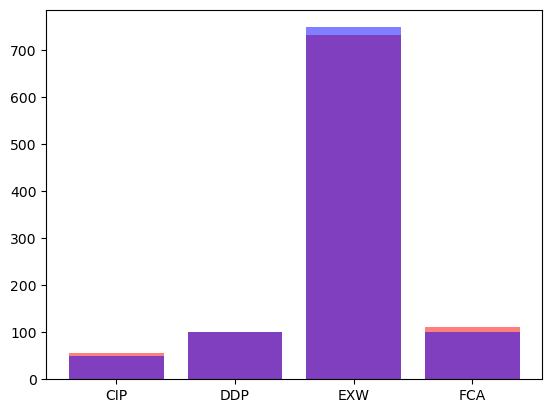

In [205]:
# Make a yellow bar graph of vendor_inco_term versus n
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color='red', alpha=0.5)
# Add blue points for hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], color='blue',alpha=0.5)
plt.show()

Beautiful bars! Two of the bars in the sample are very close to the hypothesized values: one is a little high and one is a little low. Head on over to the next exercise to test if these differences are statistically significant.

In [206]:
alpha = 1

In [207]:
# Perform a goodness of fit test on vendor_inco_term
gof_test = chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['n'])


# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)


Fail to reject the null hypothesis and conclude that n follows the distribution specified by hypothesized.

## Assumptions in hypothesis testing

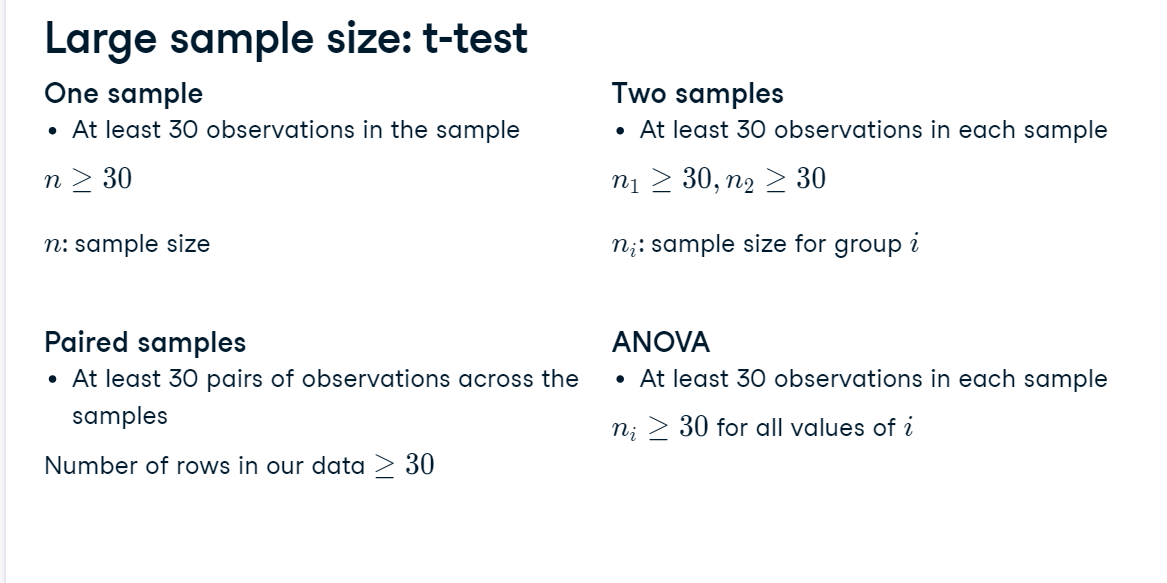

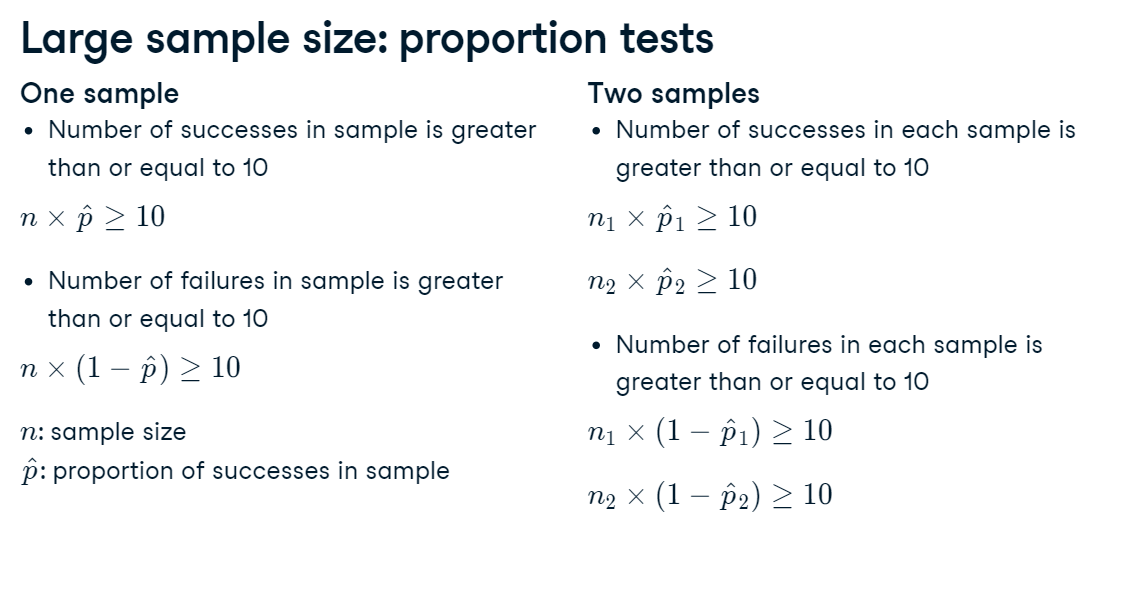

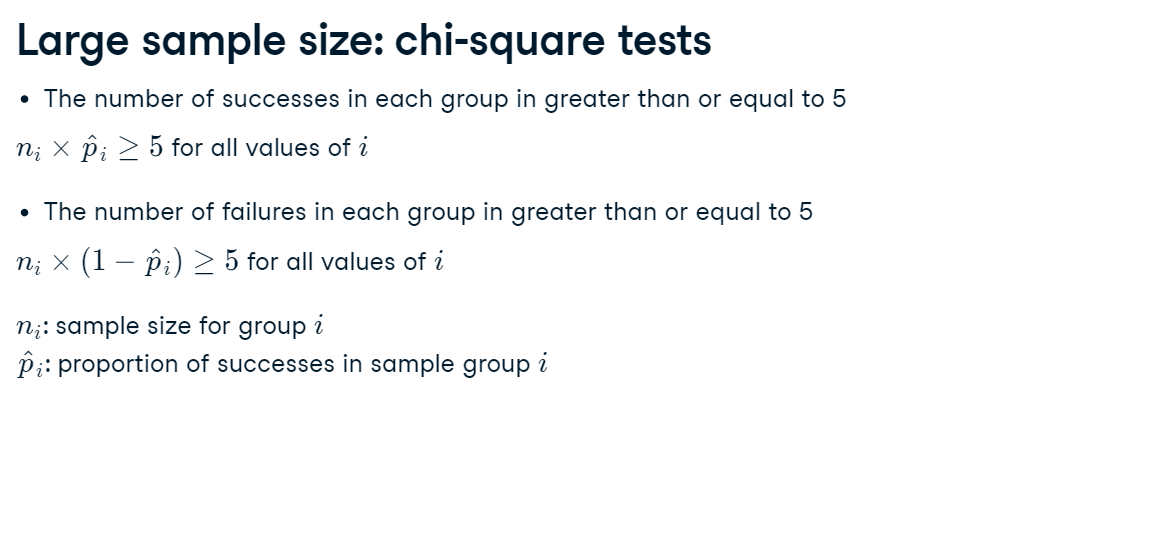

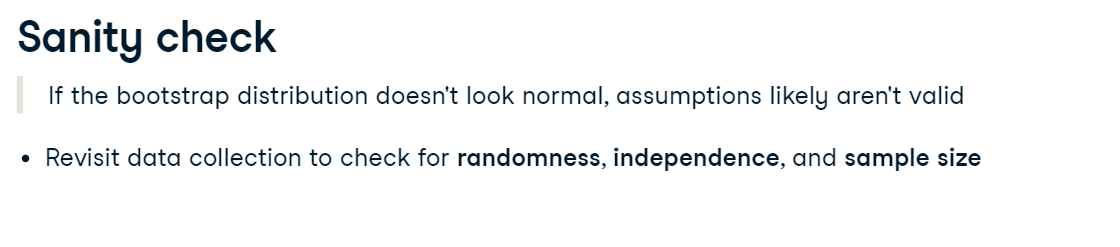

##### Testing sample size

In [208]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_group'].value_counts()

# Print the result
print(counts)

freight_cost_group
expensive     545
reasonable    454
Name: count, dtype: int64


In [209]:
# Inspect whether the counts are big enough
print((counts >= 30).all())

True


In [210]:
# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

late
No     938
Yes     61
Name: count, dtype: int64


In [211]:
# Inspect whether the counts are big enough
print((counts >= 10).all())

True


In [212]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts()

# Print the result
print(counts)


vendor_inco_term  freight_cost_group
CIP               reasonable             34
                  expensive              22
DDP               expensive              55
                  reasonable             45
EXW               expensive             430
                  reasonable            302
FCA               reasonable             73
                  expensive              38
Name: count, dtype: int64


In [213]:
# Inspect whether the counts are big enough
print((counts >= 5).all())

True


In [214]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

shipment_mode
Air            905
Ocean           88
Air Charter      6
Name: count, dtype: int64


In [215]:
# Inspect whether the counts are big enough
print((counts >= 30).all())

False


Setting a great example for an ample sample! While randomness and independence of observations can't easily be tested programmatically, you can test that your sample sizes are big enough to make a hypothesis test appropriate. Based on the last result, we should be a little cautious of the ANOVA test results given the small sample size for Air Charter.

# NON-PARAMETRIC TESTS

##### When sample is small or not normally distributed

In [216]:
x = [1, 15, 3, 10, 6]

In [217]:
rang = [1, 5, 2, 4, 3]

In [218]:
from scipy.stats import rankdata
rankdata(x)

array([1., 5., 2., 4., 3.])

In [219]:
repub_vote_small = pd.read_feather("repub_votes_potus_08_12.feather")

In [220]:
repub_vote_small

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757
...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478
96,Wisconsin,La Crosse,37.490904,40.577038
97,Wisconsin,Lafayette,38.104967,41.675050
98,Wyoming,Weston,76.684241,83.983328


In [221]:
repub_vote_small = repub_vote_small[repub_vote_small.index.isin([80, 84, 33, 81, 93])]

In [222]:
repub_vote_small

,state,county,repub_percent_08,repub_percent_12
33,Kentucky,Powell,57.059533,61.727293
80,Texas,Red River,68.507522,69.944817
81,Texas,Schleicher,74.386503,77.384464
84,Texas,Walker,60.707197,64.971903
93,West Virginia,Morgan,60.857614,64.068711


In [223]:
repub_vote_small["diff"] = repub_vote_small["repub_percent_08"] - repub_vote_small["repub_percent_12"]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13024\1403995690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repub_vote_small["diff"] = repub_vote_small["repub_percent_08"] - repub_vote_small["repub_percent_12"]


In [224]:
repub_vote_small

,state,county,repub_percent_08,repub_percent_12,diff
33,Kentucky,Powell,57.059533,61.727293,-4.667760
80,Texas,Red River,68.507522,69.944817,-1.437295
81,Texas,Schleicher,74.386503,77.384464,-2.997961
84,Texas,Walker,60.707197,64.971903,-4.264705
93,West Virginia,Morgan,60.857614,64.068711,-3.211097


In [225]:
repub_vote_small["abs_diff"] = repub_vote_small["diff"].abs()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13024\2672002203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repub_vote_small["abs_diff"] = repub_vote_small["diff"].abs()


In [226]:
repub_vote_small["rank_abs_diff"] = rankdata(repub_vote_small["abs_diff"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13024\3069208619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repub_vote_small["rank_abs_diff"] = rankdata(repub_vote_small["abs_diff"])


In [227]:
repub_vote_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
33,Kentucky,Powell,57.059533,61.727293,-4.667760,4.667760,5.0
80,Texas,Red River,68.507522,69.944817,-1.437295,1.437295,1.0
81,Texas,Schleicher,74.386503,77.384464,-2.997961,2.997961,2.0
84,Texas,Walker,60.707197,64.971903,-4.264705,4.264705,4.0
93,West Virginia,Morgan,60.857614,64.068711,-3.211097,3.211097,3.0


In [228]:
# Somme des rangs de difference negative et somme des rangs de difference positive

In [229]:
T_minus = 5 + 1 + 2 + 4 + 3 

In [230]:
T_minus

15

In [231]:
T_plus = 0 # Dans la colonne diff, il n y a pas de valeur positive et donc la somme des rangs poditif est 0

In [232]:
# La stat W
W = np.min([T_minus, T_plus])

In [233]:
W

0

In [234]:
# Implementation avec pingouin.wilcoxon

In [235]:
alpha = 0.01

In [236]:
pingouin.wilcoxon(
    x=repub_vote_small["repub_percent_08"],
    y=repub_vote_small["repub_percent_12"],
    alternative="less"
)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.72


On retrouve la stat W = 0 et la p_value est superieur a alpha 0.01. Fail to reject H0.

### Tests non apparies et ANOVA non-parametriques

### Wilcoxon-Mann-Whitney test setup

In [237]:
age_vs_comp = stack_overflow[["converted_comp", "age_first_code_cut"]]

On pivote pour une version large du dataframe

In [238]:
age_vs_comp_wide = age_vs_comp.pivot(columns="age_first_code_cut", values="converted_comp")

In [239]:
age_vs_comp_wide

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


In [240]:
alpha = 0.01

In [241]:
pingouin.mwu(
    x=age_vs_comp_wide["child"],
    y=age_vs_comp_wide["adult"],
    alternative="greater"
)

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,0.222516,0.611258


### Kruskal-Wallis test

Kruskal-Wallis test est a Wilcoxon-Mann-Whitney test cs que ANOVA est s T-test

In [242]:
alpha = 0.01

Pas besoin de pivot sur les donnees

In [243]:
pingouin.kruskal(data=stack_overflow,
                dv="converted_comp",
                between="job_sat"
)

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


Au moins une des remunerations est differents dans les 5 groupes de satisfaction 

In [244]:
# late_fishments

Wilcoxon-Mann-Whitney

In [245]:
# Choose the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(
    x=weight_vs_late_wide['Yes'],
    y=weight_vs_late_wide['No'],
    alternative='two-sided'
)

In [246]:
# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  38087.0   two-sided  0.000014  0.331294  0.665647


Kruskal-Wallis

In [247]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data = late_shipments,
        dv='weight_kilograms',
        between='shipment_mode'
    )

# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  124.983244  7.248254e-28
